# EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
import phik

In [105]:
# Загрузили трэин
#df_train = pd.read_csv('C:/Users/Test/Documents/DS/docs/titanic/train.csv')
#df_test = pd.read_csv('C:/Users/Test/Documents/DS/docs/titanic/test.csv')
df_submission = pd.read_csv('C:/Users/Test/Documents/DS/docs/titanic/gender_submission.csv')

In [73]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Посмотрели обшую информацию
df_train.info()
# RangeIndex: 891 entries, 0 to 890
# dtypes: float64(2), int64(5), object(5)

# Survived, Pclass, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
# drop PassengerId, Name, Ticket, Cabin

# drop na Age, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
import missingno as msno

<AxesSubplot:>

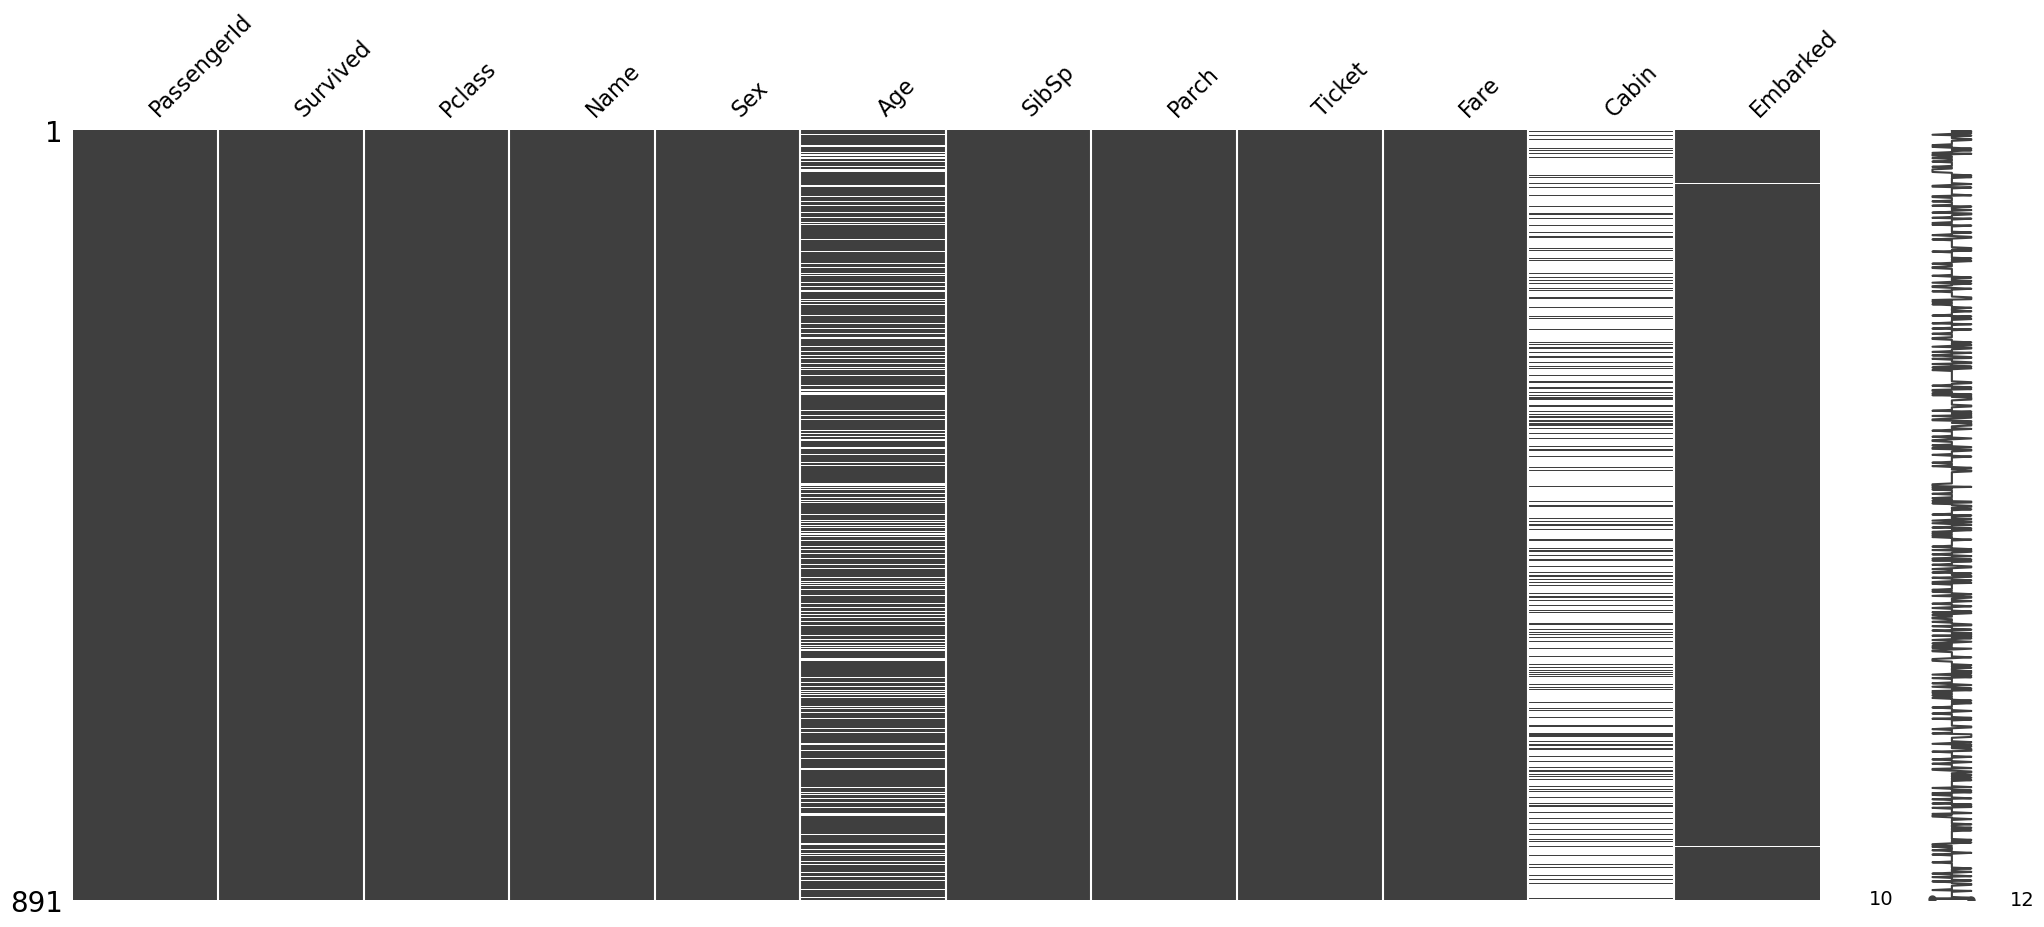

In [71]:
msno.matrix(df_train)

In [107]:
# серднее пропусков по колонкам
df_train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [102]:
# Оставил нужные колонки / убрал строки с пропусками
df_train = df_train[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']]
df_train = df_train.dropna()

In [8]:
df_train.info()
# Int64Index: 714 entries, 0 to 890

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [57]:
# Проверил дубликаты
df_train.duplicated().sum()
# 0

0

In [58]:
# Инфо по чилсовым столбцам
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,PassengerId
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,448.589888
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,258.683191
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,222.750000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,445.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,677.250000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,891.000000


In [74]:
# Посмотрели обшую информацию
df_train.info()
# Survived -2   - Выжил / не выжил
# Pclass   -3   - Класс каюты
# Sex      -2   - Пол
# Age      -88  - Возраст
# SibSp    -6   - Братьев и сестер на борту
# Parch    -7   - Родителей - детей на борту

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [5]:
# Количество уникальных признаков в каждом столбце
df_train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        220
dtype: int64

In [96]:
# Выдержка
df_train = pd.read_csv('C:/Users/Test/Documents/DS/docs/titanic/train.csv')
df_test = pd.read_csv('C:/Users/Test/Documents/DS/docs/titanic/test.csv')
df_train = df_train[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']].dropna()
model = df_train.groupby('Sex', as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex'}, axis = 1)
df_train = df_train.merge(model, how = 'left', on = 'Sex')
df_train = df_train.assign(score_mean = df_train.Survived.mean())
np.random.seed(42)
df_train.score_sex = df_train.score_sex - np.random.uniform(0,0.01,size=len(df_train))
model = df_train.groupby(['Sex','Pclass'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass'}, axis = 1)
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass'])
model = df_train.groupby(['Sex','Pclass', 'SibSp'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass_sibsp'}, axis = 1)
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass', 'SibSp'])
model = df_train.groupby(['Sex','Pclass', 'SibSp', 'Parch'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass_sibsp_path'}, axis = 1)
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass', 'SibSp', 'Parch'])

print(df_train.head(3))

# Текущие результаты:
print('uplift')
print('uplift_score_mean_BL:', uplift(df_train, 'score_mean', 0.2))
print('uplift_score_sex :', uplift(df_train, 'score_sex', 0.2))
print('uplift_score_sex_pclass:', uplift(df_train, 'score_sex_pclass', 0.2))
print('uplift_score_sex_pclass_sibsp:', uplift(df_train, 'score_sex_pclass_sibsp', 0.2))
print('uplift_score_sex_pclass_sibsp_path:', uplift(df_train, 'score_sex_pclass_sibsp_path', 0.2), 'во столько раз обгоняем рандомную модель')
print('log_loss')
print('log_loss_score_mean_BL:', log_loss(df_train.Survived, df_train.score_mean))
print('log_loss_score_sex:', log_loss(df_train.Survived, df_train.score_sex))
print('log_loss_score_sex_pclass:', log_loss(df_train.Survived, df_train.score_sex_pclass))
print('log_loss_score_sex_pclass_sibsp_path:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp_path))
# Тенденции корректные: uplift растёт / log_loss падает

   Survived  Pclass     Sex  SibSp  Parch  score_sex  score_mean  \
0         0       3    male      1      0   0.185163    0.383838   
1         1       1  female      1      0   0.732531    0.383838   
2         1       3  female      0      0   0.734718    0.383838   

   score_sex_pclass  score_sex_pclass_sibsp  score_sex_pclass_sibsp_path  
0          0.135447                0.222222                     0.125000  
1          0.968085                0.950000                     1.000000  
2          0.500000                0.592593                     0.616667  
uplift
uplift_score_mean_BL: 0.891812865497076
uplift_score_sex : 1.8128654970760232
uplift_score_sex_pclass: 2.4269005847953213
uplift_score_sex_pclass_sibsp: 2.4122807017543857
uplift_score_sex_pclass_sibsp_path: 2.4707602339181287 во столько раз обгоняем рандомную модель
log_loss
log_loss_score_mean_BL: 0.6659119735267652
log_loss_score_sex: 0.5154833289117284
log_loss_score_sex_pclass: 0.4478658239783676
log_loss_score_

In [75]:
df_train

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0
...,...,...,...,...,...
886,0,2,male,0,0
887,1,1,female,0,0
888,0,3,female,1,2
889,1,1,male,0,0


# Target

In [ ]:
# Target - Survived - 1 or 0

In [ ]:
# Необходимо разработать модель предсказания выживания, основанную на данных из трэина

In [ ]:
# Необходимо решать методом классификации, так как на вызоде необходимо получить 1 или 0

In [ ]:
# Необходимо определить склонность к 1 или 0
# Скорринг на выживание - значение 1 в колонке Survived

# Human Learning

In [79]:
# Survived -2   - Выжил / не выжил
# Pclass   -3   - Класс каюты
# Sex      -2   - Пол
# Age      -88  - Возраст
# SibSp    -6   - Братьев и сестер на борту
# Parch    -7   - Родителей - детей на борту

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [46]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [45]:
# Общий процент выживших
#df_train.Survived.value_counts()
#df_train.Survived.mean()
df_train.Survived.value_counts(normalize = True)
# Итого только около 40% выжило (1) / 60% умерло (0)

0    0.593838
1    0.406162
Name: Survived, dtype: float64

In [ ]:
# При помощи Phik выясним от каких переменных больше зависит искомое значение

In [47]:
# Установка
! pip install phik

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     -------------------------------------- 663.5/663.5 kB 3.2 MB/s eta 0:00:00


In [12]:
# Импорт
import phik

In [105]:
# Загружаем данные из дф в phik  и сохраняем в пересенную phik_overview
phik_overview = df_train.phik_matrix()

interval columns not set, guessing: ['Survived', 'Pclass', 'SibSp', 'Parch', 'score_sex', 'score_mean', 'score_sex_pclass', 'score_sex_pclass_sibsp', 'score_sex_pclass_sibsp_path']


C:\Users\Test\AppData\Roaming\Python\Python39\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable score_mean for analysis 1. Dropping this column
  warnings.warn(


In [106]:
# Нас интересует колонка Survived
# На выходе список с фичами, которые влияют на колонку Survived. Значимость по убыванию
reasons = phik_overview.Survived  \
    .reset_index()  \
    .sort_values('Survived', ascending = False)  \
    .drop(0, axis=0)
reasons

,index,Survived
6,score_sex_pclass,0.830414
7,score_sex_pclass_sibsp,0.821316
2,Sex,0.750322
5,score_sex,0.750322
8,score_sex_pclass_sibsp_path,0.671992
1,Pclass,0.205464
3,SibSp,0.175652
4,Parch,0.147080


In [258]:
# Поработаем с самой главной фичой - Sex
# Первая модель
model = df_train.groupby('Sex', as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex'}, axis = 1)
# Джоин модели к дф
df_train = df_train.merge(model, how = 'left', on = 'Sex')
df_train.head(3)
# First model is:
# female - scorring = 0.75
# male - scorring = 0.20

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex
0,0,3,male,22.0,1,0,7.2500,0.205298
1,1,1,female,38.0,1,0,71.2833,0.754789
2,1,3,female,26.0,0,0,7.9250,0.754789


# Baseline

In [188]:
# Создадим колонку в дф с базовым решением - просто среднее арифметическое
df_train = df_train.assign(score_mean = df_train.Survived.mean())
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean
0,0,3,male,22.0,1,0,7.2500,0.205298,0.406162
1,1,1,female,38.0,1,0,71.2833,0.754789,0.406162
2,1,3,female,26.0,0,0,7.9250,0.754789,0.406162


In [6]:
# Находим погрешность (ошибку) своего решения
# Невозможно интерпретировать на прямую
# Используется для минимизации ошибки
from sklearn.metrics import log_loss

In [ ]:
# Логарифмическая потеря – метрика оценки эффективности Модели (Model) Бинарной классификации (Binary Classification).
# Логарифмическая потеря указывает, насколько близка вероятность предсказания к соответствующему истинному значению (0 
# или 1 в случае двоичной классификации).
# Чем больше прогнозируемая вероятность отклоняется от фактического значения, тем выше значение логарифма потерь.
# чем дальше вероятность предсказания от фактического значения, тем выше значение логарифмических потерь.

# Чем меньше это число, тем лучше!

In [79]:
log_loss(df_train.Survived, df_train.score_mean)
# 0.6754313479380426
# Вот это наш Baseline
# Необходимо получать цтфру меньше этой
# Если получаем цифру больше - что-то делам не так - ухудшаем модель

0.6754313479380426

In [81]:
# Решение на основе данных из колонки Sex
log_loss(df_train.Survived, df_train.score_sex)
# 0.5257004244724451
# Уже лучше сразу

0.5257004244724451

# Uplift

In [ ]:
# Метрика, которая нам понятна / интуитивная
# Лучшая для классификации
# По - человечески замерить наш скор

In [83]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean
0,0,3,male,22.0,1,0,7.2500,0.205298,0.406162
1,1,1,female,38.0,1,0,71.2833,0.754789,0.406162
2,1,3,female,26.0,0,0,7.9250,0.754789,0.406162


In [85]:
# Мне необходимо найти топ 20 выживших
# Худшая сортировка - случайная сортировка - случайная выборка 20 % от дф

0.3916083916083916

In [107]:
# Сколько свего выжило в дф
survived_all = df_train.Survived.sum()
survived_all

290

In [108]:
# Сколько выживших в нашей выборке
survived_sample_20 = df_train.Survived.sample(frac = 0.2, random_state = 42).sum()
survived_sample_20

56

In [112]:
# Отношение случайной выборки к общим данным
sample_20_all = survived_sample_20 / survived_all
sample_20_all
# 0.19310344827586207

0.19310344827586207

In [100]:
# Теперь из основного дф возъём только 20%, отсортированных по score_sex по убыванию
top_20_score_sex = df_train.sort_values('score_sex', ascending = False).head(round(len(df_train)*0.2))
top_20_score_sex

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean
440,1,3,female,22.0,0,0,7.7750,0.754789,0.406162
198,0,3,female,25.0,0,0,7.7750,0.754789,0.406162
205,0,3,female,41.0,0,2,20.2125,0.754789,0.406162
580,0,3,female,25.0,1,0,7.9250,0.754789,0.406162
202,0,3,female,29.0,1,1,10.4625,0.754789,0.406162
...,...,...,...,...,...,...,...,...,...
263,1,2,female,36.0,0,0,13.0000,0.754789,0.406162
264,1,3,female,31.0,1,1,20.5250,0.754789,0.406162
265,1,1,female,16.0,0,1,57.9792,0.754789,0.406162
622,1,1,female,17.0,1,0,57.0000,0.754789,0.406162


In [137]:
# Отношение топ 20% к общим данным
top_20_all = top_20_score_sex.Survived.sum() / survived_all
top_20_all
# 0.3793103448275862
# Значение в простой выборке - 0.19310344827586207
# Соотношение выживших в топ 20 больше в 1,97 раза

0.3793103448275862

In [138]:
# Uplift это:
# Отношение топ 20% к обшей / отношение случайных 20% к общей
# 1.9642857142857142
top_20_all / sample_20_all
# Я лучше, чем рандом (случайная сортировка) в 1.9642857142857142 раз
# Интуитивная метрика
# На сколько мы превосходим наш Baseline

1.9642857142857142

# Добавим шума

In [117]:
# Созданием случайным очень маленьких цифр
np.random.seed(42)  # зафиксировали рандом
np.random.uniform(0,0.01,size=len(df_train))

array([3.74540119e-03, 9.50714306e-03, 7.31993942e-03, 5.98658484e-03,
       1.56018640e-03, 1.55994520e-03, 5.80836122e-04, 8.66176146e-03,
       6.01115012e-03, 7.08072578e-03, 2.05844943e-04, 9.69909852e-03,
       8.32442641e-03, 2.12339111e-03, 1.81824967e-03, 1.83404510e-03,
       3.04242243e-03, 5.24756432e-03, 4.31945019e-03, 2.91229140e-03,
       6.11852895e-03, 1.39493861e-03, 2.92144649e-03, 3.66361843e-03,
       4.56069984e-03, 7.85175961e-03, 1.99673782e-03, 5.14234438e-03,
       5.92414569e-03, 4.64504127e-04, 6.07544852e-03, 1.70524124e-03,
       6.50515930e-04, 9.48885537e-03, 9.65632033e-03, 8.08397348e-03,
       3.04613769e-03, 9.76721140e-04, 6.84233027e-03, 4.40152494e-03,
       1.22038235e-03, 4.95176910e-03, 3.43885211e-04, 9.09320402e-03,
       2.58779982e-03, 6.62522284e-03, 3.11711076e-03, 5.20068021e-03,
       5.46710279e-03, 1.84854456e-03, 9.69584628e-03, 7.75132823e-03,
       9.39498942e-03, 8.94827350e-03, 5.97899979e-03, 9.21874235e-03,
      

In [252]:
# Добавляем шум в колонку модели
np.random.seed(42)
df_train.score_sex = df_train.score_sex - np.random.uniform(0,0.01,size=len(df_train))

In [127]:
# Проверка уникальности значений
df_train.score_sex.nunique()
# 714 уникальных значения

714

In [142]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean
0,0,3,male,22.0,1,0,7.2500,0.198064,0.406162
1,1,1,female,38.0,1,0,71.2833,0.735987,0.406162
2,1,3,female,26.0,0,0,7.9250,0.739163,0.406162
3,1,1,female,35.0,1,0,53.1000,0.739152,0.406162
4,0,3,male,35.0,0,0,8.0500,0.202495,0.406162
...,...,...,...,...,...,...,...,...,...
709,0,3,female,39.0,0,5,29.1250,0.746491,0.406162
710,0,2,male,27.0,0,0,13.0000,0.187829,0.406162
711,1,1,female,19.0,0,0,30.0000,0.739182,0.406162
712,1,1,male,26.0,0,0,30.0000,0.200533,0.406162


In [149]:
# Проверим топ 20% с учётом шума
top_20_score_sex_new = df_train.sort_values('score_sex', ascending = False).head(round(len(df_train)*0.2)).Survived.sum()
top_20_score_sex_new / survived_all
# 0.3689655172413793

0.3689655172413793

# Function for Uplift

In [4]:
def uplift(df, score, pct):
    survived_all = df.Survived.sum()
    df = df.sort_values(score, ascending = False)
    survived_found = df.head(round(len(df)*pct)).Survived.sum()
    return (survived_found / survived_all) / pct

In [ ]:
# uplift - это отношение:
# суммарное значение первых 20%, отфильтрованных по убыванию скорринга с применением нашей модели
# к
# суммарному значению из всего дф

In [192]:
# Проверка uplift на модели score_sex
survived_all = df_train.Survived.sum()
top_20_score_sex_new = df_train.sort_values('score_sex', ascending = False).head(round(len(df_train)*0.2)).Survived.sum()
top_20_score_sex_new / survived_all / 0.2
# Сначала умножили на 0.2 (взяли только 20%)
# Потом разделили на 0.2 (взяли 100%)

1.8620689655172413

In [63]:
# Текущие результаты:
print('uplift')
print('uplift_score_mean_BL:', uplift(df_train, 'score_mean', 0.2))
print('uplift_score_sex :', uplift(df_train, 'score_sex', 0.2))
print('log_loss')
print('log_loss_score_mean_BL:', log_loss(df_train.Survived, df_train.score_mean))
print('log_loss_score_sex:', log_loss(df_train.Survived, df_train.score_sex))
# Тенденции корректные: uplift растёт / log_loss падает

uplift
uplift_score_mean_BL: 1.0344827586206895
uplift_score_sex : 1.8620689655172413
log_loss
log_loss_score_mean_BL: 0.6754313479380426
log_loss_score_sex: 0.5258352976280165


# Добавим в модель Fare / НЕ ДОБАВЛЯЕМ! / Взамен есть Pclass - лучше

In [200]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean
0,0,3,male,22.0,1,0,7.2500,0.201553,0.406162
1,1,1,female,38.0,1,0,71.2833,0.745282,0.406162
2,1,3,female,26.0,0,0,7.9250,0.747469,0.406162


In [213]:
df_train.Fare.describe()

count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

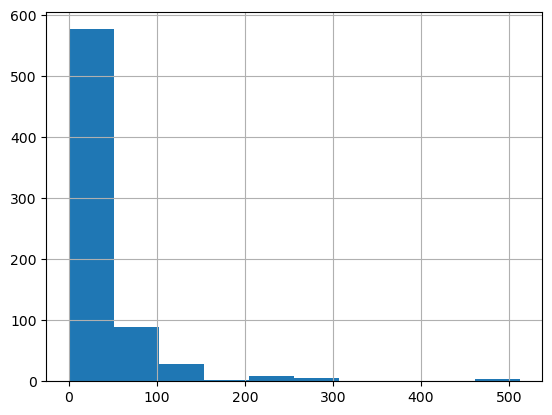

In [202]:
df_train.Fare.hist()

In [43]:
# Разделим на группы через cut взамен qcut
# Опытным путём выяснилось, что белее 5 групп не целосообразно
df_train = df_train.assign(fare_group = pd.cut(df_train.Fare, [-float('inf'), 7.913, 13.0, 26.0, 46.9, float('inf')]))
# (4, interval[float64, right]): [(-inf, 8.05] < (8.05, 15.742] < (15.742, 33.375] < (33.375, inf]]

In [221]:
# Для сложных случаев:
#applying-pandas-qcut-bins-to-new-data
pd.qcut(df_train.Fare, 4, retbins = True, labels = False)

(0      0
 1      3
 2      0
 3      3
 4      0
       ..
 709    2
 710    1
 711    2
 712    2
 713    0
 Name: Fare, Length: 714, dtype: int64,
 array([  0.    ,   8.05  ,  15.7417,  33.375 , 512.3292]))

In [248]:
# Добавляем новую таблицу в модель нашу:
model = df_train.groupby(['Sex','fare_group'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_fare'}, axis = 1)
# Джоин модели к дф
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'fare_group'])
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean,fare_group,score_sex_fare_x,score_sex_fare_y,score_sex_fare,score_sex_fare_last_x,score_sex_fare_last_y
0,0,3,male,22.0,1,0,7.2500,0.201553,0.406162,"(-inf, 7.913]",0.129630,0.091667,0.087500,0.087500,0.091667
1,1,1,female,38.0,1,0,71.2833,0.745282,0.406162,"(46.9, inf]",0.910112,0.974026,0.818182,0.818182,0.974026
2,1,3,female,26.0,0,0,7.9250,0.747469,0.406162,"(7.913, 13.0]",0.620690,0.698113,0.583333,0.583333,0.698113


# Добавим в модель Pclass

In [56]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean,fare_group,score_sex_fare
0,0,3,male,22.0,1,0,7.2500,0.201553,0.406162,"(-inf, 7.913]",0.091667
1,1,1,female,38.0,1,0,71.2833,0.745282,0.406162,"(46.9, inf]",0.974026
2,1,3,female,26.0,0,0,7.9250,0.747469,0.406162,"(7.913, 13.0]",0.698113


In [59]:
df_train.Pclass.describe()

count    714.000000
mean       2.236695
std        0.838250
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

<AxesSubplot:>

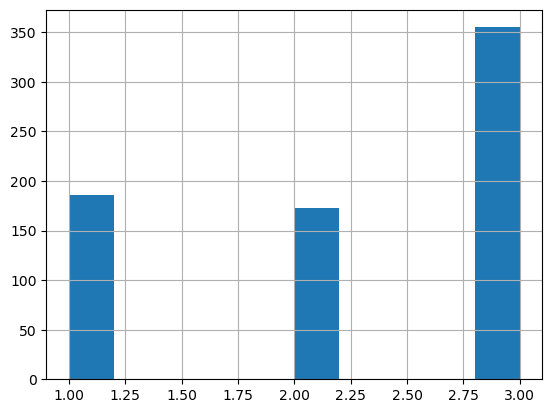

In [47]:
df_train.Pclass.hist()

In [65]:
# Добавляем новую таблицу в модель нашу:
model = df_train.groupby(['Sex','Pclass'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass'}, axis = 1)
# Джоин модели к дф
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass'])
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,score_sex,score_mean,score_sex_pclass
0,0,3,male,22.0,1,0,7.2500,0.201553,0.406162,0.150198
1,1,1,female,38.0,1,0,71.2833,0.745282,0.406162,0.964706
2,1,3,female,26.0,0,0,7.9250,0.747469,0.406162,0.460784


# Добавим в модель SibSp

In [ ]:
# Количество братьев и сестёр на борту

In [73]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,score_sex,score_mean,score_sex_pclass
0,0,3,male,22.0,1,0,0.201553,0.406162,0.150198
1,1,1,female,38.0,1,0,0.745282,0.406162,0.964706
2,1,3,female,26.0,0,0,0.747469,0.406162,0.460784


In [76]:
df_train.SibSp.describe()

count    714.000000
mean       0.512605
std        0.929783
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: SibSp, dtype: float64

<AxesSubplot:>

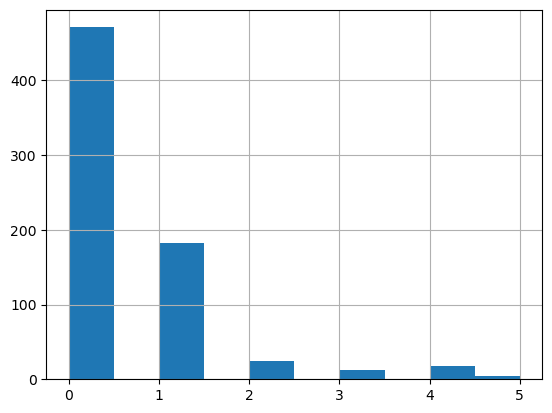

In [75]:
df_train.SibSp.hist()

In [78]:
# Добавляем новую таблицу в модель нашу:
model = df_train.groupby(['Sex','Pclass', 'SibSp'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass_sibsp'}, axis = 1)
# Джоин модели к дф
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass', 'SibSp'])
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,score_sex,score_mean,score_sex_pclass,score_sex_pclass_sibsp
0,0,3,male,22.0,1,0,0.201553,0.406162,0.150198,0.228571
1,1,1,female,38.0,1,0,0.745282,0.406162,0.964706,0.941176
2,1,3,female,26.0,0,0,0.747469,0.406162,0.460784,0.553571


# Добавим в модель Age / НЕ ДОБАВИМ!

In [90]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,score_sex,score_mean,score_sex_pclass,score_sex_pclass_sibsp,age_group
0,0,3,male,22.0,1,0,0.201553,0.406162,0.150198,0.228571,"(16.336, 32.252]"
1,1,1,female,38.0,1,0,0.745282,0.406162,0.964706,0.941176,"(32.252, 48.168]"
2,1,3,female,26.0,0,0,0.747469,0.406162,0.460784,0.553571,"(16.336, 32.252]"


In [82]:
df_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

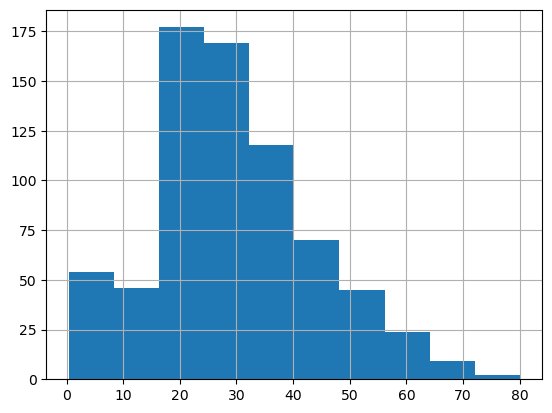

In [83]:
df_train.Age.hist()

In [86]:
# Разделим на группы через cut взамен qcut
# Опытным путём выяснилось, что белее 5 групп не целосообразно
df_train = df_train.assign(age_group = pd.cut(df_train.Age, [-float('inf'), 16.336, 32.252, 48.168, 64.084, float('inf')]))

In [89]:
# Добавляем новую таблицу в модель нашу:
#model = 
df_train.groupby(['Sex','Pclass', 'SibSp', 'age_group'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass_sibsp_age'}, axis = 1)
# Джоин модели к дф
#df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass', 'SibSp'])
#df_train.head(3)

ValueError: Length of values (74) does not match length of index (180)

# Добавим в модель Parch

In [127]:
df_train.head(3)

,Survived,Pclass,Sex,SibSp,Parch,score_sex,score_mean,score_sex_pclass,score_sex_pclass_sibsp,score_sex_pclass_sibsp_path
0,0,3,male,1,0,0.185163,0.383838,0.135447,0.222222,0.125000
1,1,1,female,1,0,0.732531,0.383838,0.968085,0.950000,1.000000
2,1,3,female,0,0,0.734718,0.383838,0.500000,0.592593,0.616667


In [96]:
df_train.Parch.describe()

count    714.000000
mean       0.431373
std        0.853289
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: Parch, dtype: float64

<AxesSubplot:>

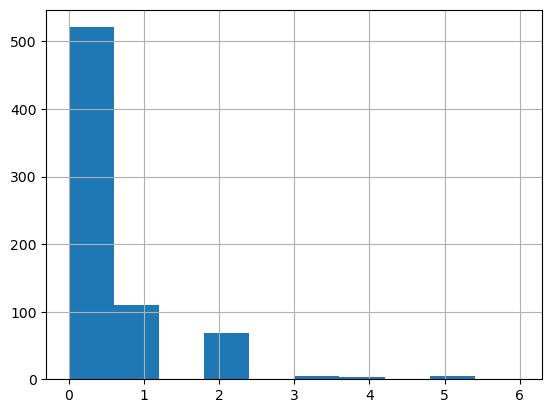

In [97]:
df_train.Parch.hist()

In [99]:
# Добавляем новую таблицу в модель нашу:
model = df_train.groupby(['Sex','Pclass', 'SibSp', 'Parch'], as_index = False).agg({'Survived':'mean'})  \
    .rename({'Survived' : 'score_sex_pclass_sibsp_path'}, axis = 1)
# Джоин модели к дф
df_train = df_train.merge(model, how = 'left', on = ['Sex', 'Pclass', 'SibSp', 'Parch'])
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,score_sex,score_mean,score_sex_pclass,score_sex_pclass_sibsp,score_sex_pclass_sibsp_path
0,0,3,male,22.0,1,0,0.201553,0.406162,0.150198,0.228571,0.176471
1,1,1,female,38.0,1,0,0.745282,0.406162,0.964706,0.941176,1.000000
2,1,3,female,26.0,0,0,0.747469,0.406162,0.460784,0.553571,0.552632


# ML / CatBoost / не на всех фичах

In [121]:
! pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [8]:
from catboost import CatBoostClassifier

In [20]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
X = ['Pclass', 'Sex', 'SibSp', 'Parch']
cat_features = ['Sex']
y = ['Survived']

In [10]:
params = {'cat_features' : cat_features,
         'verbose' : 100,
         'random_seed': 42,
         'learning_rate' : 0.05}

In [11]:
model_cb = CatBoostClassifier(**params)

In [12]:
# Валидировались прямо на основном дф
model_cb.fit(df_train[X], df_train[y], eval_set=(df_train[X],df_train[y]))
# bestTest = 0.3898745797
# log_loss_score_sex_pclass_sibsp_path: 0.3886332953497882
# С данным набором фичей CatBoost не смог лучше сделать

0:	learn: 0.6656926	test: 0.6657258	best: 0.6657258 (0)	total: 143ms	remaining: 2m 23s
100:	learn: 0.4098242	test: 0.4098672	best: 0.4098672 (100)	total: 242ms	remaining: 2.15s
200:	learn: 0.3997776	test: 0.3998210	best: 0.3998210 (200)	total: 331ms	remaining: 1.31s
300:	learn: 0.3953492	test: 0.3953915	best: 0.3953915 (300)	total: 430ms	remaining: 999ms
400:	learn: 0.3931042	test: 0.3931454	best: 0.3931454 (400)	total: 523ms	remaining: 781ms
500:	learn: 0.3919900	test: 0.3920308	best: 0.3920308 (500)	total: 613ms	remaining: 611ms
600:	learn: 0.3912240	test: 0.3912633	best: 0.3912633 (600)	total: 716ms	remaining: 476ms
700:	learn: 0.3906503	test: 0.3906914	best: 0.3906914 (700)	total: 814ms	remaining: 347ms
800:	learn: 0.3902981	test: 0.3903387	best: 0.3903387 (800)	total: 913ms	remaining: 227ms
900:	learn: 0.3900270	test: 0.3900676	best: 0.3900676 (900)	total: 1.01s	remaining: 111ms
999:	learn: 0.3898339	test: 0.3898746	best: 0.3898746 (999)	total: 1.11s	remaining: 0us

bestTest = 0.3

In [124]:
# Предсказание для теста
model_cb.predict(df_train[X])
# В таком случае выдаст сразу предсказание на 1 или 0
# Просто округляет по границе 0,5
# НАМ НЕ НУЖНО ЭТО ПОКА! Нам нужны скоры

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [13]:
# Вытасиваем скоры
# ЭТО СКОРЫ, А не ВЕРОЯТНОСТЬ!
# model_cb.predict_proba(df_train[X])
# Два значения. Первое - скор на 0, второе на 1. Нам нужно второе значение
model_cb.predict_proba(df_train[X])[:,1]  # все строки / второе значение

array([0.12563078, 0.99914795, 0.61661519, 0.99914795, 0.12123097,
       0.12123097, 0.33342203, 0.0010858 , 0.60031912, 0.8328744 ,
       0.49908109, 0.97125486, 0.12123097, 0.01189997, 0.61661519,
       0.90709524, 0.00172864, 0.09661958, 0.49966142, 0.61661519,
       0.09661958, 0.09661958, 0.61661519, 0.33342203, 0.01002025,
       0.47083947, 0.12123097, 0.02441212, 0.61661519, 0.12123097,
       0.33342203, 0.99914795, 0.61661519, 0.09661958, 0.45496377,
       0.45496377, 0.12123097, 0.12123097, 0.52135453, 0.49966142,
       0.49966142, 0.8328744 , 0.12123097, 0.99184241, 0.61661519,
       0.12123097, 0.12563078, 0.61661519, 0.12160171, 0.49966142,
       0.00172864, 0.12123097, 0.99914795, 0.8328744 , 0.21985571,
       0.33342203, 0.90709524, 0.12123097, 0.99184241, 0.00520477,
       0.12123097, 0.97125486, 0.45496377, 0.00689781, 0.33342203,
       0.40090532, 0.90709524, 0.12123097, 0.32461705, 0.12160171,
       0.09661958, 0.00952773, 0.09661958, 0.12563078, 0.12123

In [14]:
# Сохраним  в дф
df_train = df_train.assign(score_sex_pclass_sibsp_path_cb = model_cb.predict_proba(df_train[X])[:,1])

In [15]:
print('uplift')
print('uplift_score_mean_BL:', uplift(df_train, 'score_mean', 0.2))
print('uplift_score_sex :', uplift(df_train, 'score_sex', 0.2))
print('uplift_score_sex_pclass:', uplift(df_train, 'score_sex_pclass', 0.2))
print('uplift_score_sex_pclass_sibsp:', uplift(df_train, 'score_sex_pclass_sibsp', 0.2))
print('uplift_score_sex_pclass_sibsp_path:', uplift(df_train, 'score_sex_pclass_sibsp_path', 0.2))
print('uplift_score_sex_pclass_sibsp_path_cb:', uplift(df_train, 'score_sex_pclass_sibsp_path_cb', 0.2))
print('log_loss')
print('log_loss_score_mean_BL:', log_loss(df_train.Survived, df_train.score_mean))
print('log_loss_score_sex:', log_loss(df_train.Survived, df_train.score_sex))
print('log_loss_score_sex_pclass:', log_loss(df_train.Survived, df_train.score_sex_pclass))
print('log_loss_score_sex_pclass_sibsp:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp))
print('log_loss_score_sex_pclass_sibsp_path:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp_path))
print('log_loss_score_sex_pclass_sibsp_path_cb:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp_path_cb))
# Тенденции корректные: uplift растёт / log_loss падает

uplift
uplift_score_mean_BL: 0.891812865497076
uplift_score_sex : 1.8128654970760232
uplift_score_sex_pclass: 2.4269005847953213
uplift_score_sex_pclass_sibsp: 2.4122807017543857
uplift_score_sex_pclass_sibsp_path: 2.4707602339181287
uplift_score_sex_pclass_sibsp_path_cb: 2.485380116959064
log_loss
log_loss_score_mean_BL: 0.6659119735267652
log_loss_score_sex: 0.5154833289117284
log_loss_score_sex_pclass: 0.4478658239783676
log_loss_score_sex_pclass_sibsp: 0.4314955803991602
log_loss_score_sex_pclass_sibsp_path: 0.3886332953497882
log_loss_score_sex_pclass_sibsp_path_cb: 0.3898745796910048


# ML / CatBoost / на всех фичах

In [16]:
df_train_all = pd.read_csv('C:/Users/Test/Documents/DS/docs/titanic/train.csv')

In [139]:
df_train_all.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [140]:
df_train_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
df_train_all = df_train_all[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket','Fare']].dropna()

In [219]:
df_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Ticket       714 non-null    object 
 8   Fare         714 non-null    float64
 9   Age          714 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB


In [18]:
X = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Name', 'Ticket','Fare']
cat_features = ['Sex', 'Name', 'Ticket']
y = ['Survived']

In [209]:
# Вывести только категориальные фичи
df_train_all.select_dtypes(include = 'object')

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,"Allen, Mr. William Henry",male,373450
...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",female,382652
886,"Montvila, Rev. Juozas",male,211536
887,"Graham, Miss. Margaret Edith",female,112053
889,"Behr, Mr. Karl Howell",male,111369


In [19]:
params = {'cat_features' : cat_features,
         'verbose' : 100,
         'random_seed': 42,
         'learning_rate' : 0.05}

In [20]:
model_cb_all = CatBoostClassifier(**params)

In [21]:
model_cb_all.fit(df_train_all[X], df_train_all[y], eval_set=(df_train_all[X],df_train_all[y]))
# bestTest = 0.1532319346

0:	learn: 0.6675715	test: 0.6675715	best: 0.6675715 (0)	total: 28ms	remaining: 28s
100:	learn: 0.3664040	test: 0.2345005	best: 0.2345005 (100)	total: 2.1s	remaining: 18.7s
200:	learn: 0.3337958	test: 0.2082609	best: 0.2081436 (199)	total: 4.05s	remaining: 16.1s
300:	learn: 0.2980841	test: 0.1857792	best: 0.1857746 (299)	total: 6.46s	remaining: 15s
400:	learn: 0.2748275	test: 0.1733300	best: 0.1733300 (400)	total: 8.87s	remaining: 13.2s
500:	learn: 0.2570812	test: 0.1609431	best: 0.1609431 (500)	total: 11.3s	remaining: 11.2s
600:	learn: 0.2446506	test: 0.1558776	best: 0.1558776 (600)	total: 13.7s	remaining: 9.09s
700:	learn: 0.2316757	test: 0.1546620	best: 0.1534028 (659)	total: 16.1s	remaining: 6.87s
800:	learn: 0.2230121	test: 0.1545193	best: 0.1533125 (766)	total: 18.5s	remaining: 4.6s
900:	learn: 0.2144506	test: 0.1541113	best: 0.1533125 (766)	total: 20.9s	remaining: 2.3s
999:	learn: 0.2082396	test: 0.1554988	best: 0.1532319 (976)	total: 23.3s	remaining: 0us

bestTest = 0.1532319346

In [22]:
# Сохраним  в дф
df_train = df_train.assign(score_all_cb = model_cb_all.predict_proba(df_train_all[X])[:,1])

In [23]:
print('uplift')
print('uplift_score_mean_BL:', uplift(df_train, 'score_mean', 0.2))
print('uplift_score_sex :', uplift(df_train, 'score_sex', 0.2))
print('uplift_score_sex_pclass:', uplift(df_train, 'score_sex_pclass', 0.2))
print('uplift_score_sex_pclass_sibsp:', uplift(df_train, 'score_sex_pclass_sibsp', 0.2))
print('uplift_score_sex_pclass_sibsp_path:', uplift(df_train, 'score_sex_pclass_sibsp_path', 0.2))
print('uplift_score_sex_pclass_sibsp_path_cb:', uplift(df_train, 'score_sex_pclass_sibsp_path_cb', 0.2))
print('uplift_score_all_cb:', uplift(df_train, 'score_all_cb', 0.2))
print('log_loss')
print('log_loss_score_mean_BL:', log_loss(df_train.Survived, df_train.score_mean))
print('log_loss_score_sex:', log_loss(df_train.Survived, df_train.score_sex))
print('log_loss_score_sex_pclass:', log_loss(df_train.Survived, df_train.score_sex_pclass))
print('log_loss_score_sex_pclass_sibsp:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp))
print('log_loss_score_sex_pclass_sibsp_path:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp_path))
print('log_loss_score_sex_pclass_sibsp_path_cb:', log_loss(df_train.Survived, df_train.score_sex_pclass_sibsp_path_cb))
print('log_loss_score_all_cb:', log_loss(df_train.Survived, df_train.score_all_cb))
# Тенденции корректные: uplift растёт / log_loss падает

# uplift_score_all_cb: 2.6023391812865495
# log_loss_score_all_cb: 0.15323193463976062

uplift
uplift_score_mean_BL: 0.891812865497076
uplift_score_sex : 1.8128654970760232
uplift_score_sex_pclass: 2.4269005847953213
uplift_score_sex_pclass_sibsp: 2.4122807017543857
uplift_score_sex_pclass_sibsp_path: 2.4707602339181287
uplift_score_sex_pclass_sibsp_path_cb: 2.485380116959064
uplift_score_all_cb: 2.6023391812865495
log_loss
log_loss_score_mean_BL: 0.6659119735267652
log_loss_score_sex: 0.5154833289117284
log_loss_score_sex_pclass: 0.4478658239783676
log_loss_score_sex_pclass_sibsp: 0.4314955803991602
log_loss_score_sex_pclass_sibsp_path: 0.3886332953497882
log_loss_score_sex_pclass_sibsp_path_cb: 0.3898745796910048
log_loss_score_all_cb: 0.15323193463976062


# Feature importances

In [234]:
# Посмотрим гавные фичи для модели на всех фичах
model_cb_all.get_feature_importance(prettified = True)

,Feature Id,Importances
0,Sex,30.724275
1,Fare,30.356816
2,Ticket,16.837095
3,Pclass,9.795761
4,Parch,6.338760
5,SibSp,5.947293
6,Name,0.000000


In [235]:
# Посмотрим гавные фичи для модели
model_cb.get_feature_importance(prettified = True)

,Feature Id,Importances
0,Sex,47.625226
1,Pclass,24.583799
2,SibSp,14.037996
3,Parch,13.752979


# Shap

In [ ]:
# Как каждая фича влияет на скор / в какую сторону фича двигает скор

In [180]:
! pip install shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 435.6/435.6 kB 1.7 MB/s eta 0:00:00


In [181]:
import shap
shap.initjs()

In [182]:
explainer = shap.TreeExplainer(model_cb_all)
shap_values = explainer.shap_values(df_train_all[X])

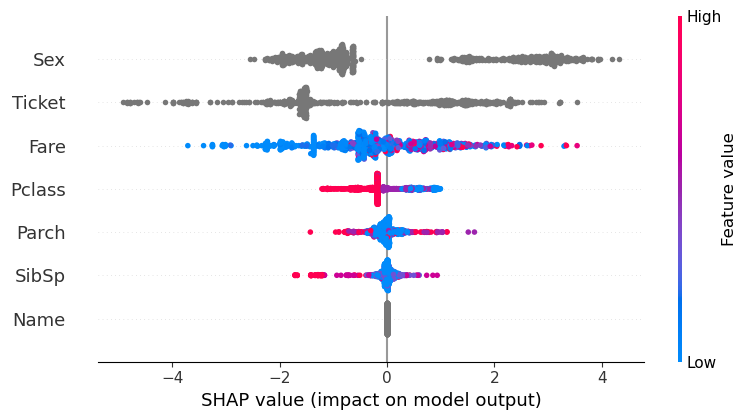

In [183]:
shap.summary_plot(shap_values, df_train_all[X])

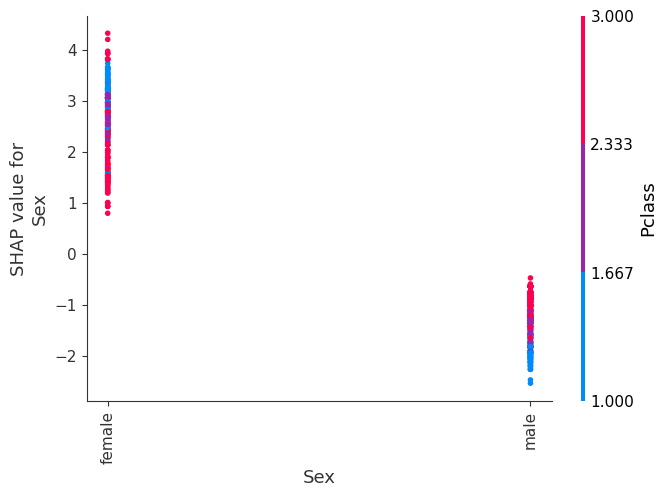

In [189]:
shap.dependence_plot('Sex', shap_values, df_train_all[X])

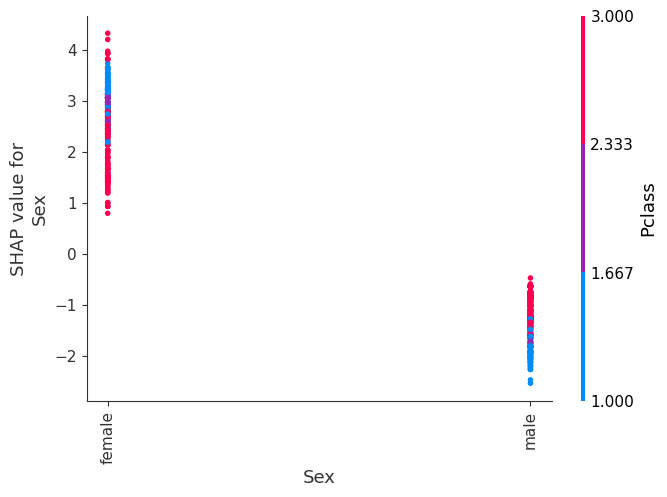

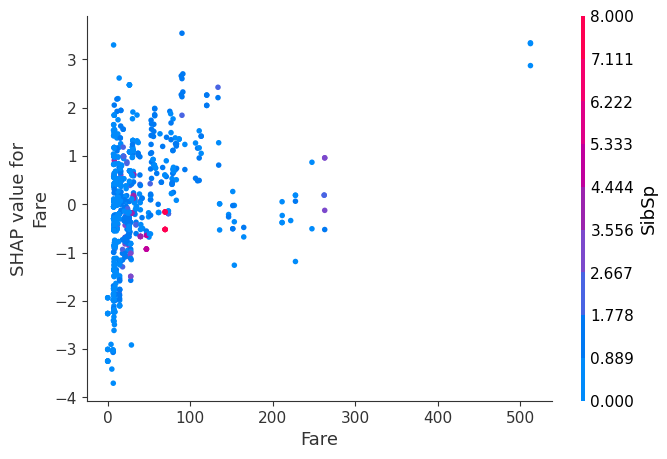

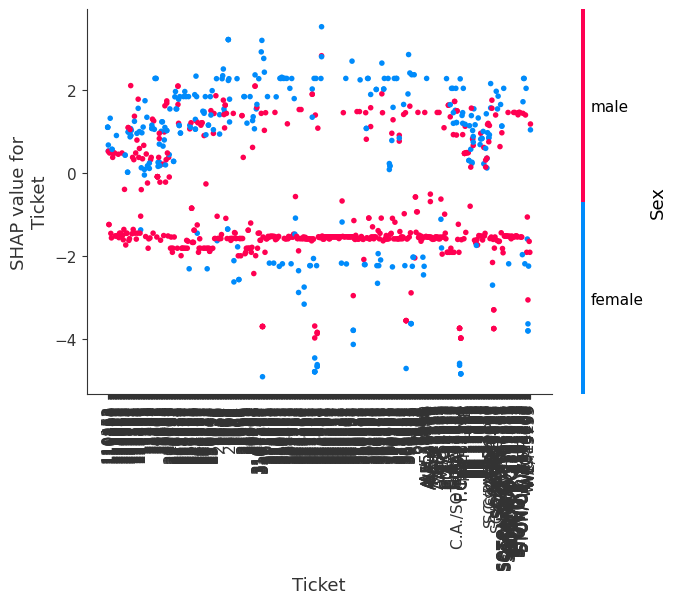

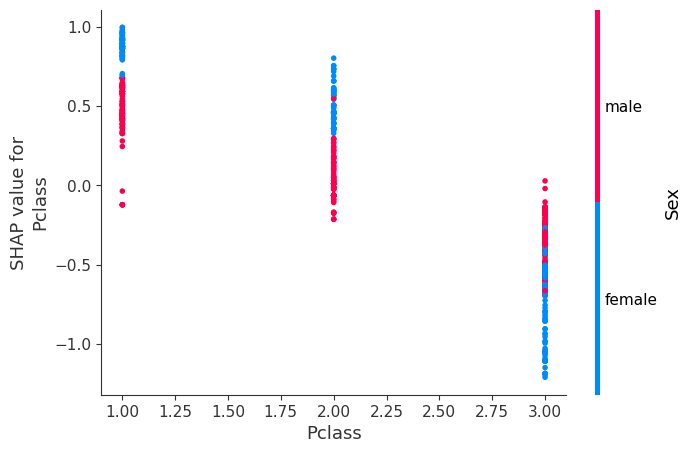

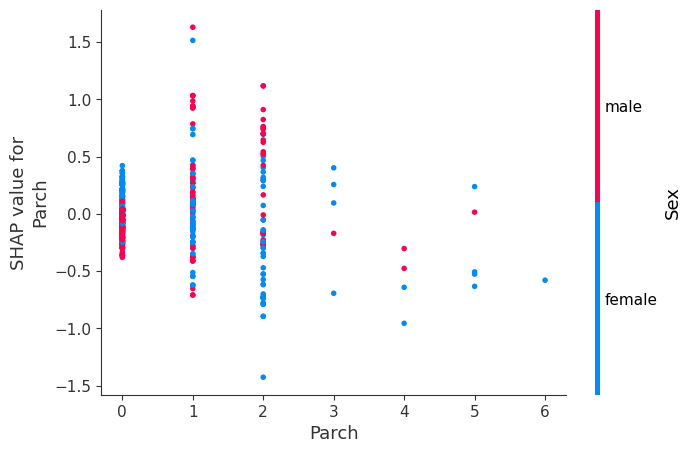

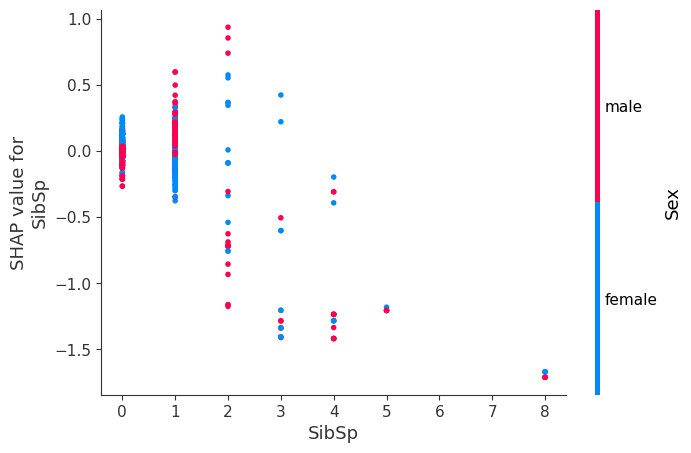

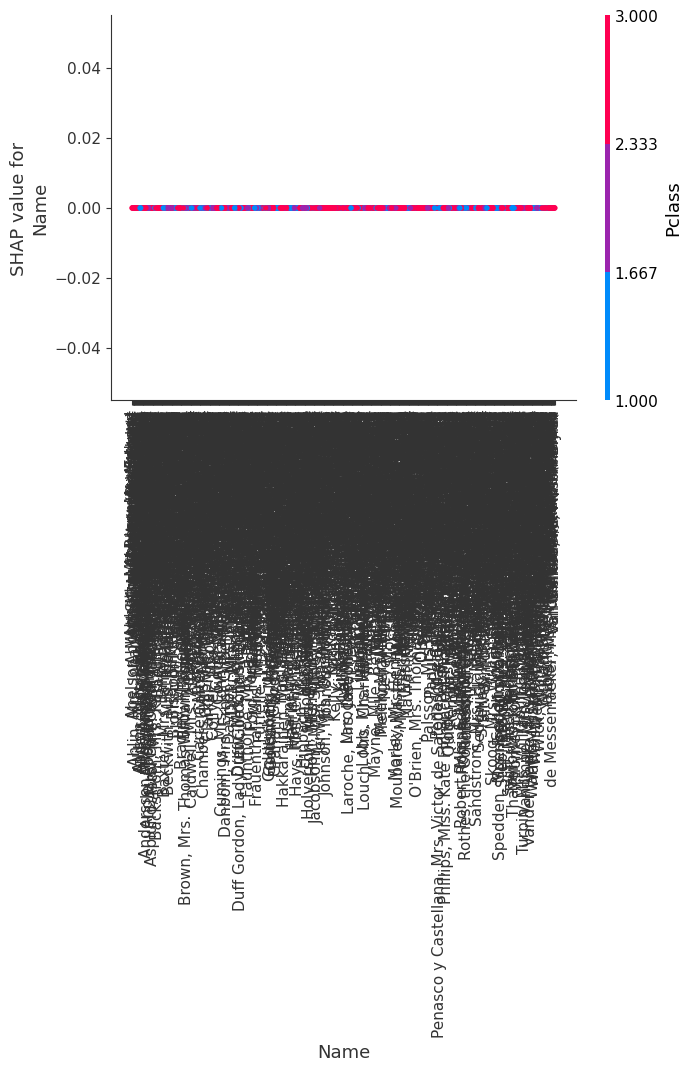

In [195]:
# Циклом пройдёмся по всем фичам и посмотрим
features = model_cb_all.get_feature_importance(prettified = True)['Feature Id'].values
for i in features:
    shap.dependence_plot(i, shap_values, df_train_all[X])

# Классификация == Регрессия (технически)

In [245]:
df_train

,Survived,Pclass,Sex,SibSp,Parch,score_sex,score_mean,score_sex_pclass,score_sex_pclass_sibsp,score_sex_pclass_sibsp_path,score_sex_pclass_sibsp_path_cb,score_all_cb
0,0,3,male,1,0,0.185163,0.383838,0.135447,0.222222,0.125000,0.125631,0.003317
1,1,1,female,1,0,0.732531,0.383838,0.968085,0.950000,1.000000,0.999148,0.998202
2,1,3,female,0,0,0.734718,0.383838,0.500000,0.592593,0.616667,0.616615,0.977229
3,1,1,female,1,0,0.736052,0.383838,0.968085,0.950000,1.000000,0.999148,0.998013
4,0,3,male,0,0,0.187348,0.383838,0.135447,0.129630,0.121212,0.121231,0.030283
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,0.182381,0.383838,0.157407,0.118421,0.097222,0.096620,0.014465
887,1,1,female,0,0,0.739656,0.383838,0.968085,0.979592,0.970588,0.971255,0.995358
888,0,3,female,1,2,0.741044,0.383838,0.500000,0.447368,0.000000,0.049704,0.032443
889,1,1,male,0,0,0.186476,0.383838,0.368852,0.329545,0.333333,0.333422,0.375409


In [246]:
# Вот это вот то, что делает CatBoost под капотом - задача регресии
# Сырой скор
model_cb_all.predict(df_train_all[X], prediction_type = 'RawFormulaVal')

array([-5.70525726e+00,  6.31947266e+00,  3.75921988e+00,  6.21895477e+00,
       -3.46640733e+00, -3.95415108e+00, -4.81320644e+00, -6.97777963e+00,
        5.73659827e+00,  4.53778733e+00,  4.56546227e+00,  4.93019398e+00,
       -3.46640733e+00, -5.49551311e+00, -2.93486628e+00,  4.89255156e+00,
       -7.74957478e+00, -1.13850457e+00, -2.01177389e+00,  6.35673058e+00,
       -4.03640856e+00, -1.13850457e+00,  4.16775710e+00, -6.80956293e-01,
       -6.44739109e+00,  3.01842896e+00, -3.64299401e+00, -5.46123407e-01,
        5.30040146e+00, -4.63983250e+00, -4.57481132e+00,  3.75982507e+00,
        3.90994615e+00, -4.38497806e+00, -3.95899182e-01,  3.98591317e-01,
       -3.91009835e-01, -3.46640733e+00, -2.03911285e+00,  4.90059614e+00,
       -4.35425397e+00, -6.41355594e-01, -4.63983250e+00,  3.19631964e+00,
        5.30040146e+00, -3.46640733e+00, -3.30950458e+00,  3.90994615e+00,
       -4.25751377e+00, -1.35994167e+00, -8.28820341e+00, -3.63318815e+00,
        6.41550412e+00,  

<AxesSubplot:>

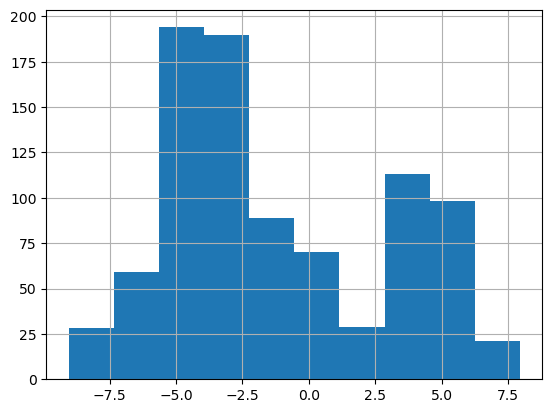

In [292]:
# Посмотрим графику - сылой скор
pd.Series(model_cb_all.predict(df_train_all[X], prediction_type = 'RawFormulaVal')).hist()

# Скор и пороги

In [ ]:
# Как на основе скора принять решение об 1 или 0
# С помощью порога на мой выбор

In [290]:
df_train

,Survived,Pclass,Sex,SibSp,Parch,score_sex,score_mean,score_sex_pclass,score_sex_pclass_sibsp,score_sex_pclass_sibsp_path,score_sex_pclass_sibsp_path_cb,score_all_cb,y_pred
0,0,3,male,1,0,0.185163,0.383838,0.135447,0.222222,0.125000,0.125631,0.003317,0
1,1,1,female,1,0,0.732531,0.383838,0.968085,0.950000,1.000000,0.999148,0.998202,1
2,1,3,female,0,0,0.734718,0.383838,0.500000,0.592593,0.616667,0.616615,0.977229,1
3,1,1,female,1,0,0.736052,0.383838,0.968085,0.950000,1.000000,0.999148,0.998013,1
4,0,3,male,0,0,0.187348,0.383838,0.135447,0.129630,0.121212,0.121231,0.030283,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,0.182381,0.383838,0.157407,0.118421,0.097222,0.096620,0.014465,0
887,1,1,female,0,0,0.739656,0.383838,0.968085,0.979592,0.970588,0.971255,0.995358,1
888,0,3,female,1,2,0.741044,0.383838,0.500000,0.447368,0.000000,0.049704,0.032443,0
889,1,1,male,0,0,0.186476,0.383838,0.368852,0.329545,0.333333,0.333422,0.375409,1


In [ ]:
# score_sex_pclass_sibsp_path - лучший ручной прогноз скоров
# score_all_cb - лучший машинный прогноз скоров

<AxesSubplot:>

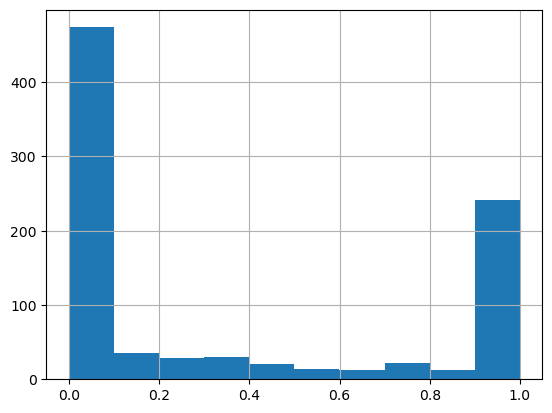

In [24]:
# Посмотрим распределение скора CatBoost
df_train.score_all_cb.hist()

In [27]:
# Столбец с предсказанием
# Должен быть в тех же единицах, что и таргет
df_train['y_pred'] = (df_train.score_all_cb > 0.5) * 1
# Установил порог 0,35

In [273]:
# Среднее число еденичек в нашем прогнозе
df_train.y_pred.mean()

0.38159371492704824

In [274]:
# Среднее число еденичек в нашем исходнике
df_train.Survived.mean()

0.3838383838383838

# Матрица ошибок

In [ ]:
# Необходимо научиться анализировать ответ

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(df_train.Survived , df_train.y_pred)
# Вернётся матрица ошибок
# Не указаны явно данные

AttributeError: 'DataFrame' object has no attribute 'y_pred'

In [318]:
# Явно указаны
tn, fp, fn, tp = confusion_matrix(df_train.Survived , df_train.y_pred).ravel()

In [298]:
tn, fp, fn, tp
# Большинтво ответов верные - 
# tn - true negative  - 516
# fp - false positive - 33
# fn - false negative - 35
# tp - true positive  - 307

(516, 33, 35, 307)

In [289]:
# Создать дф из матрицы
pd.DataFrame(confusion_matrix(df_train.Survived , df_train.y_pred))

,0,1
0,516,33
1,35,307


# Recall / Полнота / sensitivity, recall, hit rate, or true positive rate (TPR)

In [ ]:
# На сколько хорошо модель умеет подсвечивать единички
# Процент правильно предсказанных 1 среди всех настоящих 1. 89% в нашем случае (0.89 далее по решению)

# Одного него не достаточно для анализа матрицы

In [319]:
recall = tp / (tp + fn)
recall
# 0.8976608187134503

0.8304093567251462

In [28]:
# Рассчтитать при помощи функции
from sklearn.metrics import recall_score

In [301]:
recall_score(df_train.Survived , df_train.y_pred)
# 0.8976608187134503
# Тот же результат

0.8976608187134503

# Precision / precision or positive predictive value (PPV)

In [ ]:
# Процент правильных 1 среди всех предсказанных 1
# Из всего того, что мы назвали 1 мы будем правы в 90% случаев - 0.90 далее рассчитано

In [302]:
precision = tp / (tp + fp)
precision
# 0.9029411764705882

0.9029411764705882

In [29]:
# Рассчтитать при помощи функции
from sklearn.metrics import precision_score

In [320]:
precision_score(df_train.Survived , df_train.y_pred)
# 0.9029411764705882
# Тот же результат

0.9435215946843853

# Precision / Recall / F1

In [ ]:
# Метрика, которая объединяет их в себе
# F1 в диапазоне от 0 до 1
# ЧЕМ БОЛЬШЕ, ТЕМ ЛУЧШЕ!
# С помощью данной метрики можно оценивать классификацию
# На сколько recall важнее, чем precision
# F = 1 -значит, что recall нам важен также, как и precision
# Исходя из задачи бизнеса значение f может быть разным!

In [ ]:
f1 = (2 * recall * precision) / (recall + precision) # 2 - указыватеся конкретно от задачи!

In [46]:
coef = 0.27
df_train['y_pred'] = (df_train.score_all_cb > coef) * 1
confusion_matrix(df_train.Survived , df_train.y_pred)
tn, fp, fn, tp = confusion_matrix(df_train.Survived , df_train.y_pred).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = (2 * recall * precision) / (recall + precision)

print(coef)
print(recall)
print(precision)
print(f1)
# coef = 0.27 - В таком случае f1 больше всего - 0.9222065063649221

0.27
0.9532163742690059
0.8931506849315068
0.9222065063649221


In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(df_train.Survived , df_train.y_pred)

0.9222065063649221

In [ ]:
# Общая функция sklearn для расчета любого f-score:
from sklearn.metrics import fbeta_score
fbeta_score(test['Exited'], test['y_pred'], beta=1)   # f1-score

# Accuracy / правильность

In [ ]:
# % правильных ответов
# Кажется, что метрика очерь хорошая и интуитивная, но это не так!
# В случае несбалансированных класов (разделение 1 и 0 перекошено) - метрика будет работать некорректно

In [ ]:
# В целом, когда не 50% на 50% то уже несбалансированные). Поэтому классы всегда на практике несбалансированные). 
# Ну особо еще выделяют сильный дисбаланс, т.е когда скажем 30 на 70 или больше. 
# А например 55 на 45 можно считать почти сбалансированными. 

In [38]:
df_train.Survived == df_train.y_pred
# True - right
# False - mistake

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool

In [47]:
# Mean
(df_train.Survived == df_train.y_pred).mean()
# 0.9382716049382716

0.9382716049382716

In [48]:
# Расчёт через матрицу ошибок
(tp + tn) / (tp + tn + fp + fn)
# 0.9382716049382716

0.9382716049382716

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(df_train.Survived , df_train.y_pred)
# 0.9382716049382716

0.9382716049382716

# Classification report

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(df_train.Survived , df_train.y_pred))
# Отчёт в виде строки

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       549
           1       0.89      0.95      0.92       342

    accuracy                           0.94       891
   macro avg       0.93      0.94      0.94       891
weighted avg       0.94      0.94      0.94       891



# Находим лучший порог / максимальный f1

In [ ]:
# Необходмо найти максимальный f1

In [54]:
porog = 0.5
df_train['y_pred'] = (df_train.score_all_cb > porog) * 1
print(classification_report(df_train.Survived , df_train.y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       549
           1       0.94      0.83      0.88       342

    accuracy                           0.92       891
   macro avg       0.92      0.90      0.91       891
weighted avg       0.92      0.92      0.91       891



In [64]:
# Берём только уникальные скоры:
df_train.score_all_cb.nunique()

497

In [72]:
# Конвертируем в лист
thrs = [0] + list(df_train.score_all_cb.unique())  # 0 - минмальный порог
# thrs - обозначение переменной, которая хранит пороги

In [73]:
# Минимальное значение
min(thrs)
# 0.00011923376738222867

0

In [74]:
thrs

[0,
 0.0033173793689045806,
 0.9982023444465776,
 0.9772287032119251,
 0.9980126319689854,
 0.030283306934966003,
 0.01881417879673949,
 0.008056344066422264,
 0.0009315026074510328,
 0.9967846491703186,
 0.989416166396362,
 0.989702082399011,
 0.9928267260098358,
 0.00408836617775247,
 0.050456666907567976,
 0.9925536091303856,
 0.0004307401235730713,
 0.24259502957464485,
 0.11797227084804585,
 0.9982679751186856,
 0.01735429578782963,
 0.9847492311501851,
 0.33604790123558237,
 0.001582143851157436,
 0.9533997760660459,
 0.02550626421204737,
 0.3667642749760653,
 0.9950351820260673,
 0.009566905658485565,
 0.0102030682591572,
 0.9772421663947375,
 0.9803521928761788,
 0.012309743222868349,
 0.40229800291962486,
 0.5983491619893923,
 0.4034742270211189,
 0.11515709849153259,
 0.992612831207146,
 0.0126889453595396,
 0.3449401698950793,
 0.960695543634894,
 0.03524656171841524,
 0.01395982180301808,
 0.20424978227212773,
 0.0002514026186961922,
 0.02575113307026323,
 0.998366677143220

In [79]:
# Цикл, который пройдётся по всем возможным скорам и вычтслим наибольший f1
from tqdm.notebook import tqdm
result = []
for thr in tqdm(thrs):
    df_train['y_pred_new'] = (df_train.score_all_cb > thr) * 1
    result.append((thr, f1_score(df_train.Survived , df_train.y_pred_new)))
# На выходе получим пары кортежей - значение скора / f1 для него

  0%|          | 0/498 [00:00<?, ?it/s]

In [85]:
# Загоняем в дф
t = pd.DataFrame(result, columns=['thr', 'f1'])
t.sort_values('f1', ascending = False)
# 0.212526	0.930168

,thr,f1
81,0.212526,0.930168
313,0.230516,0.929972
328,0.207351,0.928870
162,0.222404,0.928671
65,0.241680,0.928471
...,...,...
252,0.998958,0.023121
167,0.999162,0.017391
191,0.999219,0.011628
275,0.999603,0.005831


# Рассчитаем максимальный f1 для ручного скора

In [90]:
thrs_ruki = [0] + list(df_train.score_sex_pclass_sibsp_path.unique())
len(thrs_ruki)

21

In [91]:
from tqdm.notebook import tqdm
result_ruki = []
for thr in tqdm(thrs_ruki):
    df_train['y_pred_new_ruki'] = (df_train.score_sex_pclass_sibsp_path > thr) * 1
    result_ruki.append((thr, f1_score(df_train.Survived , df_train.y_pred_new_ruki)))
# На выходе получим пары кортежей - значение скора / f1 для него

  0%|          | 0/21 [00:00<?, ?it/s]

In [92]:
t_ruki = pd.DataFrame(result_ruki, columns=['thr', 'f1'])
t_ruki.sort_values('f1', ascending = False)
# 0.333333	0.759602

,thr,f1
5,0.333333,0.759602
15,0.400000,0.758419
13,0.454545,0.753404
14,0.222222,0.749367
1,0.125000,0.745932
9,0.500000,0.731466
4,0.121212,0.726835
18,0.545455,0.724832
19,0.571429,0.719864
7,0.600000,0.711572


In [ ]:
# F1 от машины больше на 1,22 раза

# Final stage

In [93]:
# Лучшая модель
model_cb_all

In [101]:
# Применияем модель к тесту, клеим скоры
df_test = df_test.assign(score_all_cb = model_cb_all.predict_proba(df_test[X])[:,1])

In [103]:
# Колонка с предиктом для теста
# Для нашей модели лучший порог был = 0.212526
df_test['y_pred'] = (df_test.score_all_cb > 0.212526) * 1

In [109]:
df_test = df_test[['PassengerId', 'y_pred']].rename({'y_pred' : 'Survived'}, axis = 1)

In [116]:
df_test.to_csv('df_submission_KSA_2023-05-16_1.csv', index = False)